In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gc
import glob

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
df = pd.read_csv('투수_EDA용 데이터_차수.csv', encoding='cp949')

In [3]:
df.columns

Index(['FA년도', '구단명', '선수명', '세부 포지션', '투', '구분', 'FA등급', '플레이년도', '나이', '게임수',
       '선발등판', '구원등판', '승리', '패전', '세이브', '블론세이브', '홀드', '블론홀드', '이닝수', '자책점',
       '피안타', '2루타허용', '3루타허용', '피홈런', '볼넷허용', '사구허용', '탈삼진', '폭투', 'ERA',
       'FIP', '선발 이닝', '구원 이닝', '선발 WAR', '구원 WAR', '종합 WAR', '연봉', '비고1',
       '잔류 여부', 'FA 계약 연수', 'FA 계약 총액', '사사구', '완투', '완봉', '투구수', '피장타율',
       '원클럽맨여부', '득점파크팩터', '홈런파크팩터', '장타파크팩터', '국대출전횟수', '구종1', '구종2',
       '구종1 구종가치', 'AAV'],
      dtype='object')

### AAV 추가

In [4]:
df.drop(columns=['AAV'], inplace=True)

In [5]:
df1 = df.groupby('선수명', as_index=False).agg({
    'FA 계약 총액': 'sum',
    'FA 계약 연수': 'sum'
})

# AAV 컬럼 생성 (총액 ÷ 연수)
df1['AAV'] = df1['FA 계약 총액'] / df1['FA 계약 연수']

# 결과 확인
print(df1.head())

       선수명  FA 계약 총액  FA 계약 연수            AAV
0  강영식(1차)    170000         4   42500.000000
1  강윤구(1차)         0         0            NaN
2      고영표   1070000         5  214000.000000
3  고효준(1차)     12000         1   12000.000000
4      구창모   1250000         6  208333.333333


In [6]:
df = df.merge(df1[['선수명', 'AAV']], on='선수명', how='left')

In [7]:
df.head()

,FA년도,구단명,선수명,세부 포지션,투,구분,FA등급,플레이년도,나이,게임수,...,피장타율,원클럽맨여부,득점파크팩터,홈런파크팩터,장타파크팩터,국대출전횟수,구종1,구종2,구종1 구종가치,AAV
0,2011,롯데,강영식(1차),RP,좌투,자격유지,A,2010,29,63,...,0.412,0,1032.0,1128.0,1093.0,0,NaN,NaN,NaN,42500.0
1,2012,롯데,강영식(1차),RP,좌투,자격유지,A,2011,30,64,...,0.360,0,1044.0,1128.0,1093.0,0,NaN,NaN,NaN,42500.0
2,2013,롯데,강영식(1차),RP,좌투,자격유지,A,2012,31,55,...,0.340,0,1033.0,1128.0,1093.0,0,NaN,NaN,NaN,42500.0
3,2014,롯데,강영식(1차),RP,좌투,자격유지,A,2013,32,55,...,0.298,0,1058.0,1128.0,1093.0,0,포심,슬라,5.0,42500.0
4,2015,롯데,강영식(1차),RP,좌투,FA 1년차,A,2014,33,52,...,0.393,0,1045.0,1102.0,1062.0,0,포심,슬라,-5.6,42500.0


In [8]:
#df.to_csv('투수_EDA용 데이터_차수_수정.csv', index= False)

### 상관관계 계산 전

In [9]:
df_col = df.copy()

In [10]:
df_col['n차'] = 0

# 조건: '선수명'에 '(2차)'가 포함되고, '구분'이 'FA 1년차'인 경우
mask = df_col['선수명'].str.contains(r'\(2차\)') & (df_col['구분'] == 'FA 1년차')

# 해당 조건을 만족하는 행에 'n차' 값을 1로 설정
df_col.loc[mask, 'n차'] = 1

In [11]:
df_col[df_col['n차'] == 1][['선수명', '플레이년도', '구분']]

,선수명,플레이년도,구분
81,박정진(2차),2014,FA 1년차
103,손승락(2차),2016,FA 1년차
145,양현종(2차),2022,FA 1년차
163,우규민(2차),2017,FA 1년차
202,윤성환(2차),2015,FA 1년차
275,정우람(2차),2016,FA 1년차
304,차우찬(2차),2017,FA 1년차


In [12]:
df[df['선수명'] == '송은범(1차)']

,FA년도,구단명,선수명,세부 포지션,투,구분,FA등급,플레이년도,나이,게임수,...,피장타율,원클럽맨여부,득점파크팩터,홈런파크팩터,장타파크팩터,국대출전횟수,구종1,구종2,구종1 구종가치,AAV
112,2012,SSG,송은범(1차),RP,우투,신규,A,2011,27,38,...,0.386,0,980.0,1172.0,988.0,1,NaN,NaN,NaN,85000.0
113,2013,SSG,송은범(1차),SP,우투,신규,A,2012,28,20,...,0.383,0,999.0,1172.0,988.0,1,NaN,NaN,NaN,85000.0
114,2014,KIA,송은범(1차),CP,우투,신규,A,2013,29,41,...,0.505,0,1022.0,1015.0,967.0,1,포심,슬라,-7.7,85000.0
115,2016,한화,송은범(1차),RP,우투,FA 1년차,A,2015,31,33,...,0.530,0,1015.0,1002.0,997.0,1,포심,슬라,-1.3,85000.0
116,2015,KIA,송은범(1차),RP,우투,신규,A,2014,30,27,...,0.523,0,1025.0,1039.0,1014.0,1,포심,슬라,-10.3,85000.0


In [13]:
df_col.loc[115,'선수명'] = '송은범(2차)'

In [14]:
df_col = df_col[df_col['선수명'] != '박정진(2차)']

In [15]:
df_col = df_col[df_col['선수명'] != '손승락(2차)']

In [16]:
df_col = df_col[df_col['선수명'] != '오승환(1차)']

In [17]:
df_col = df_col[df_col['선수명'] != '김광현(2차)']

In [18]:
df_col = df_col[df_col['선수명'] != '류현진']

In [19]:
df_col = df_col[df_col['선수명'] != '강윤구(1차)']

In [20]:
#df_col = df_col[df_col['구분'] != 'FA 1년차']

In [24]:
df_col = df_col[~((df_col['구분'] == 'FA 1년차') & (df_col['n차'] == 0))]

In [25]:
df_col['n차'].value_counts()

n차
0    276
1      5
Name: count, dtype: int64

# 4년 통산/평균 상관관계

### 상관관계 종합 war

In [118]:

from scipy.stats import pearsonr

# 1. 선수명별로 이닝수 합계와 AAV 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '종합 WAR': 'mean',
    'AAV': 'mean'
}).reset_index()

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#grouped = grouped.dropna(subset=['이닝수', 'AAV'])

# 3. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['종합 WAR'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.823


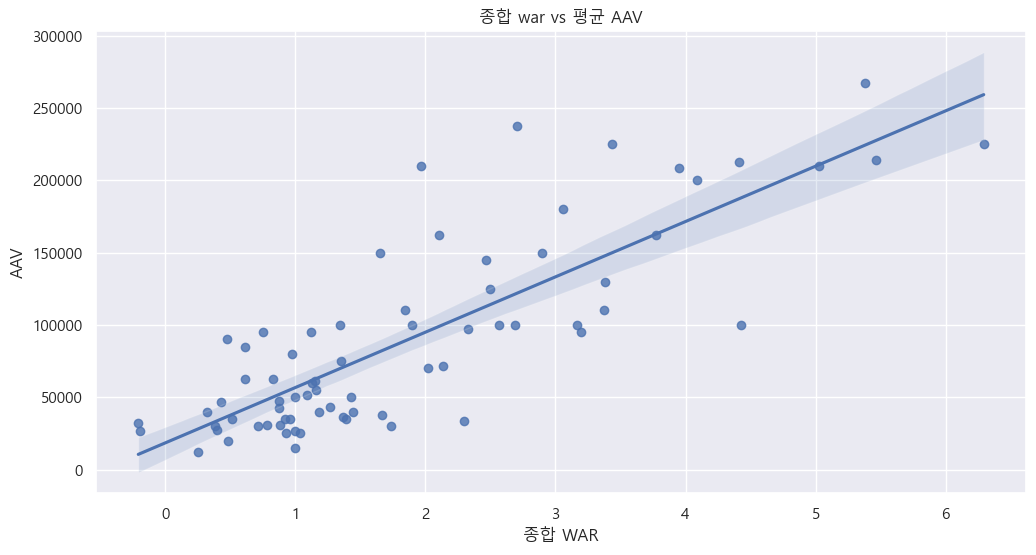

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='종합 WAR', y='AAV')
plt.title('종합 war vs 평균 AAV')
plt.show()

### 상관관계 선발 war

In [129]:
# 1. 선수명별로 이닝수 합계와 AAV 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '선발 WAR': 'mean',
    'AAV': 'mean',
    '선발 이닝': 'mean'
}).reset_index()

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#grouped = grouped.dropna(subset=['이닝수', 'AAV'])
grouped = grouped[grouped['선발 이닝'] >35]
# 3. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['선발 WAR'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.819


In [131]:
len(grouped)

35

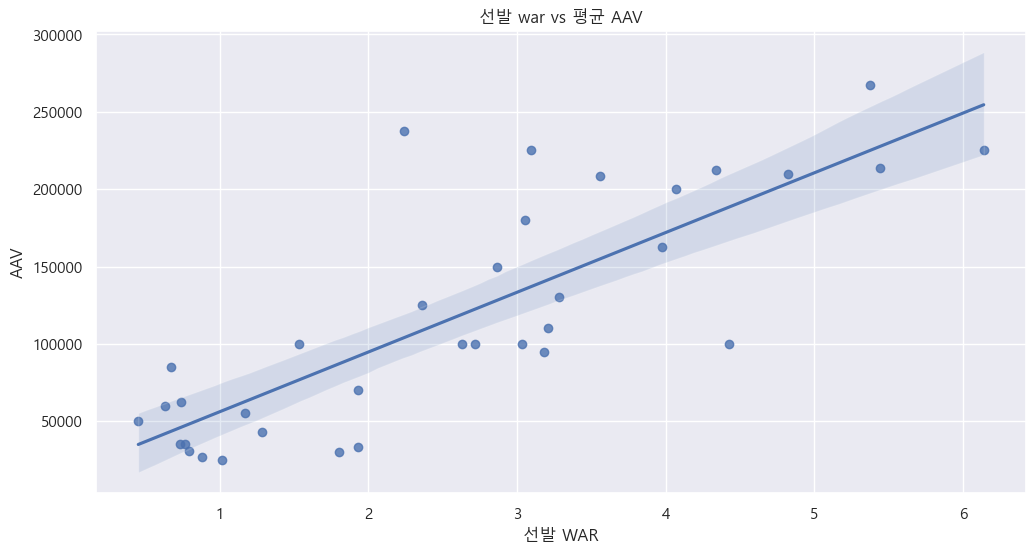

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='선발 WAR', y='AAV')
plt.title('선발 war vs 평균 AAV')
plt.show()

### 상관관계 구원 war

In [132]:
# 1. 선수명별로 이닝수 합계와 AAV 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '구원 WAR': 'mean',
    'AAV': 'mean',
    '구원 이닝': 'mean'
}).reset_index()

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#grouped = grouped.dropna(subset=['이닝수', 'AAV'])
grouped = grouped[grouped['구원 이닝'] >10]
# 3. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['구원 WAR'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.373


In [133]:
len(grouped)

50

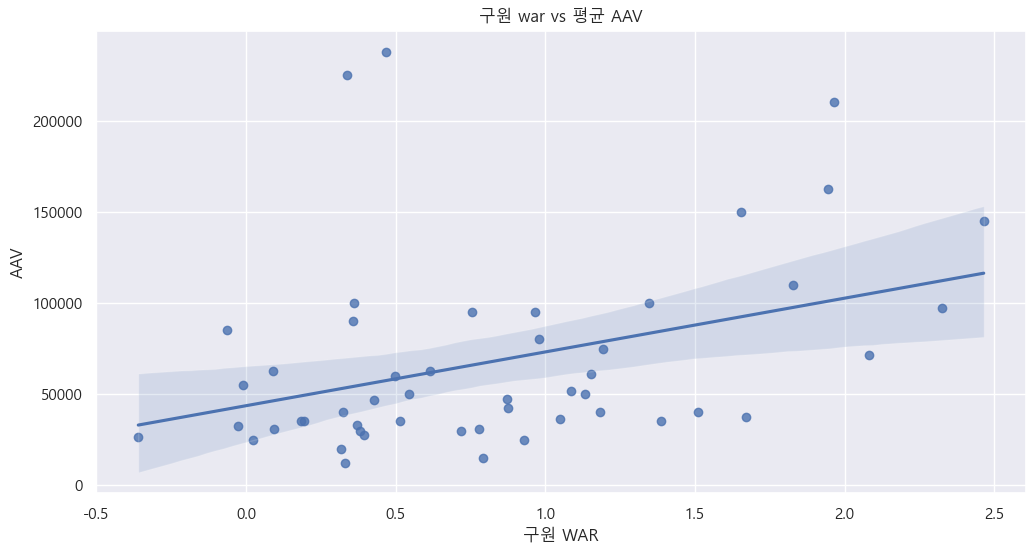

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='구원 WAR', y='AAV')
plt.title('구원 war vs 평균 AAV')
plt.show()

### 상관관계 FIP

In [46]:
# 1. 선수명별로 이닝수 합계와 AAV 평균 구하기
grouped = df_col.groupby('선수명').agg({
    'FIP': 'mean',
    'AAV': 'mean'
}).reset_index()

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#grouped = grouped.dropna(subset=['이닝수', 'AAV'])
#grouped = grouped[grouped['선발 WAR'] !=0]
# 3. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['FIP'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.452


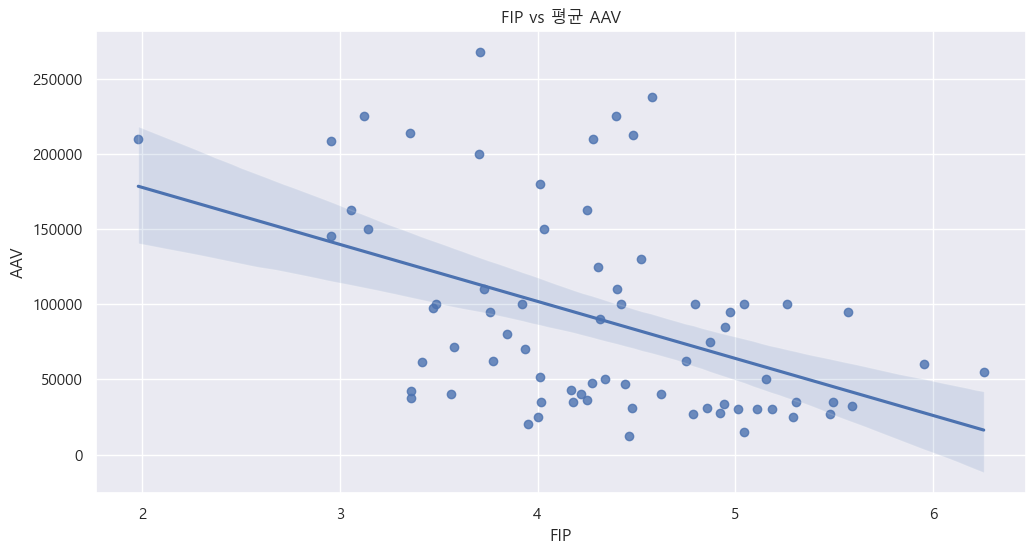

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='FIP', y='AAV')
plt.title('FIP vs 평균 AAV')
plt.show()

### 상관관계 피장타율

In [45]:
# 1. 선수명별로 이닝수 합계와 AAV 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '피장타율': 'mean',
    'AAV': 'mean'
}).reset_index()

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#grouped = grouped.dropna(subset=['이닝수', 'AAV'])
#grouped = grouped[grouped['선발 WAR'] !=0]
# 3. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['피장타율'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.387


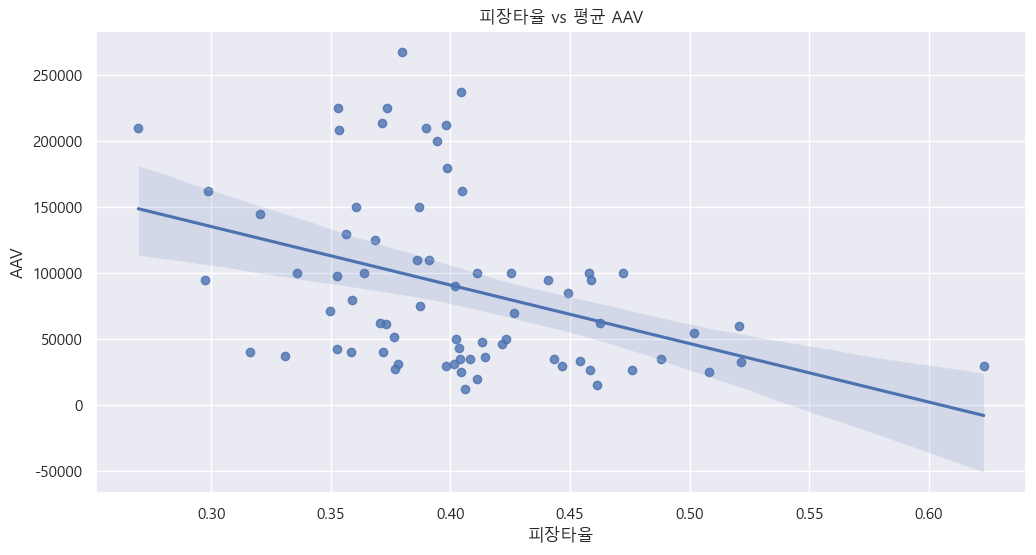

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='피장타율', y='AAV')
plt.title('피장타율 vs 평균 AAV')
plt.show()

### 상관관계 ERA*

In [56]:
# 1. 선수명별로 자책점 합계, 이닝수 합계 구하기
grouped = df_col.groupby('선수명').agg({
    '자책점': 'sum',  # 자책점 합계
    '이닝수': 'sum',  # 이닝수 합계
    'AAV': 'mean'     # AAV 평균
}).reset_index()

# 2. ERA* 계산: (자책점 합계 / 이닝수 합계)
grouped['ERA*'] = (grouped['자책점'] / grouped['이닝수'])

# 3. 상관계수 계산 (ERA*와 AAV의 상관관계)
corr_coef, p_value = pearsonr(grouped['ERA*'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.521


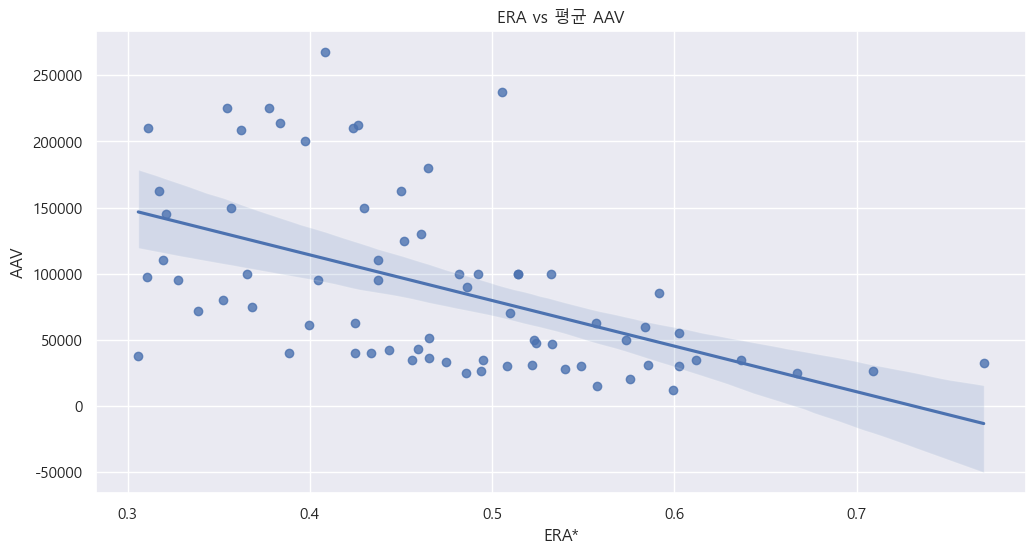

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='ERA*', y='AAV')
plt.title('ERA vs 평균 AAV')
plt.show()

### 상관관계 K/9

In [54]:
# 1. 선수명별로 탈삼진 합계, 이닝수 합계 구하기
grouped = df_col.groupby('선수명').agg({
    '탈삼진': 'sum',  # 자책점 합계
    '이닝수': 'sum',  # 이닝수 합계
    'AAV': 'mean'     # AAV 평균
}).reset_index()

# 2. ERA* 계산: (탈삼진 합계 / 이닝수 합계) * 9
grouped['K/9'] = (grouped['탈삼진'] / grouped['이닝수']) * 9

# 3. 상관계수 계산 (ERA*와 AAV의 상관관계)
corr_coef, p_value = pearsonr(grouped['K/9'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.241


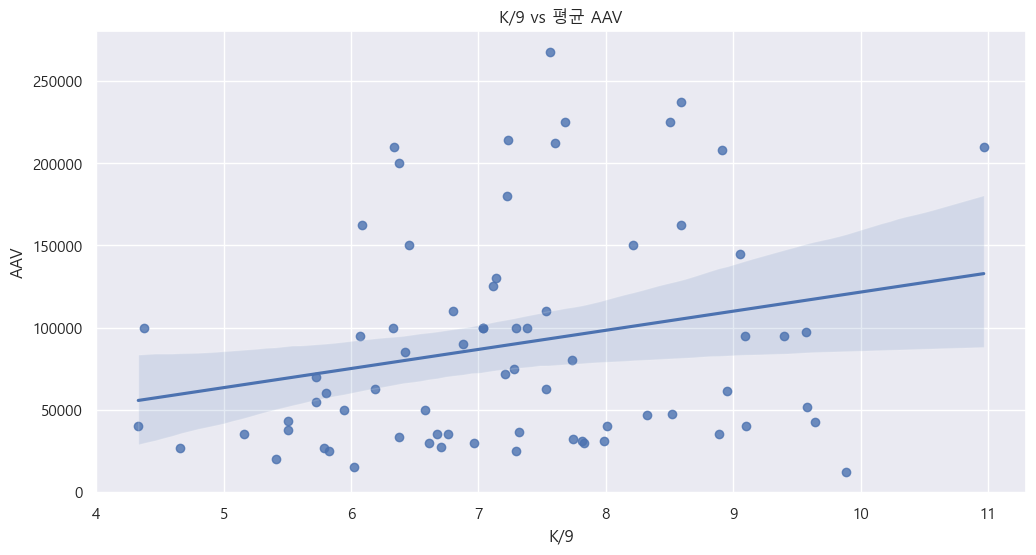

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='K/9', y='AAV')
plt.title('K/9 vs 평균 AAV')
plt.show()

### 상관관계 BB/9

In [58]:
# 1. 선수명별로 사사구 합계, 이닝수 합계 구하기
grouped = df_col.groupby('선수명').agg({
    '사사구': 'sum',  # 자책점 합계
    '이닝수': 'sum',  # 이닝수 합계
    'AAV': 'mean'     # AAV 평균
}).reset_index()

# 2. ERA* 계산: (사사구 합계 / 이닝수 합계) * 9
grouped['BB/9'] = (grouped['사사구'] / grouped['이닝수']) * 9

# 3. 상관계수 계산 (ERA*와 AAV의 상관관계)
corr_coef, p_value = pearsonr(grouped['BB/9'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.383


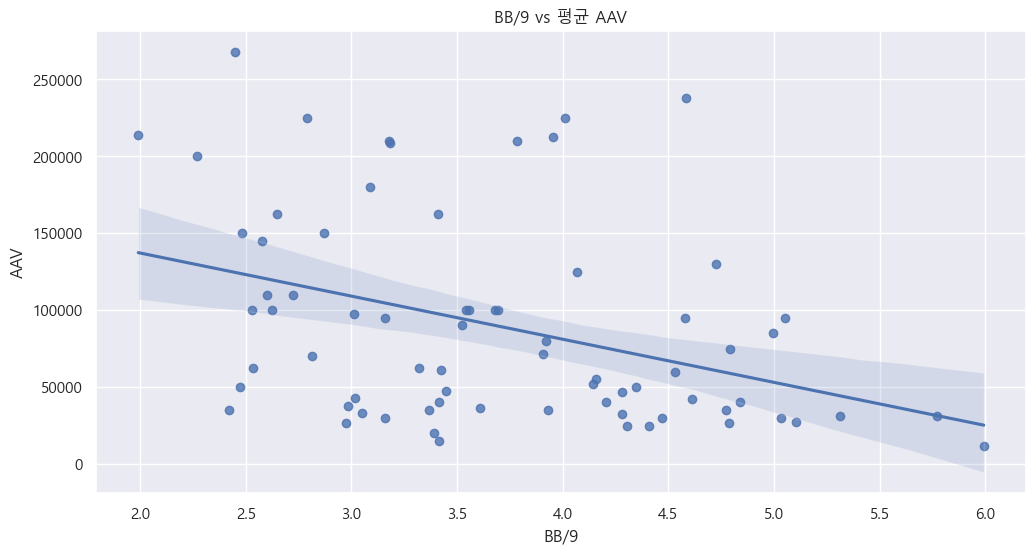

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='BB/9', y='AAV')
plt.title('BB/9 vs 평균 AAV')
plt.show()

### 상관관계 이닝수

In [60]:
# 1. 선수명별로 이닝수 합계와 AAV 평균 구하기
grouped = df_col.groupby('선수명').agg({
    '이닝수': 'sum',
    'AAV': 'mean'
}).reset_index()

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#grouped = grouped.dropna(subset=['이닝수', 'AAV'])
#grouped = grouped[grouped['선발 WAR'] !=0]
# 3. 상관계수 계산
corr_coef, p_value = pearsonr(grouped['이닝수'], grouped['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.646


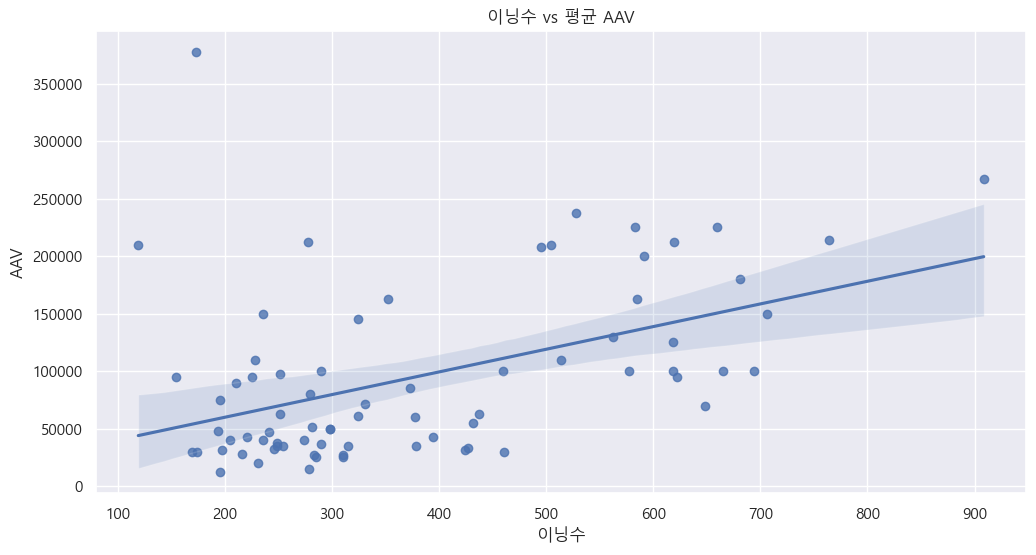

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='이닝수', y='AAV')
plt.title('이닝수 vs 평균 AAV')
plt.show()

### 상관관계 이닝수(선발)

In [63]:
# 1. 선수명 단위로 이닝수 합계, AAV 평균, 선발 이닝 평균 계산
grouped = df.groupby('선수명').agg({
    '이닝수': 'sum',
    'AAV': 'mean',
    '선발 이닝': 'mean'
}).reset_index()

# 2. 평균 선발 이닝이 35보다 큰 선수만 필터링
filtered = grouped[grouped['선발 이닝'] > 35]

# 3. 결측치 및 이닝수 0 제거
filtered = filtered.dropna(subset=['이닝수', 'AAV'])
filtered = filtered[filtered['이닝수'] > 0]

# 4. 상관계수 계산
corr_coef, p_value = pearsonr(filtered['이닝수'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.302


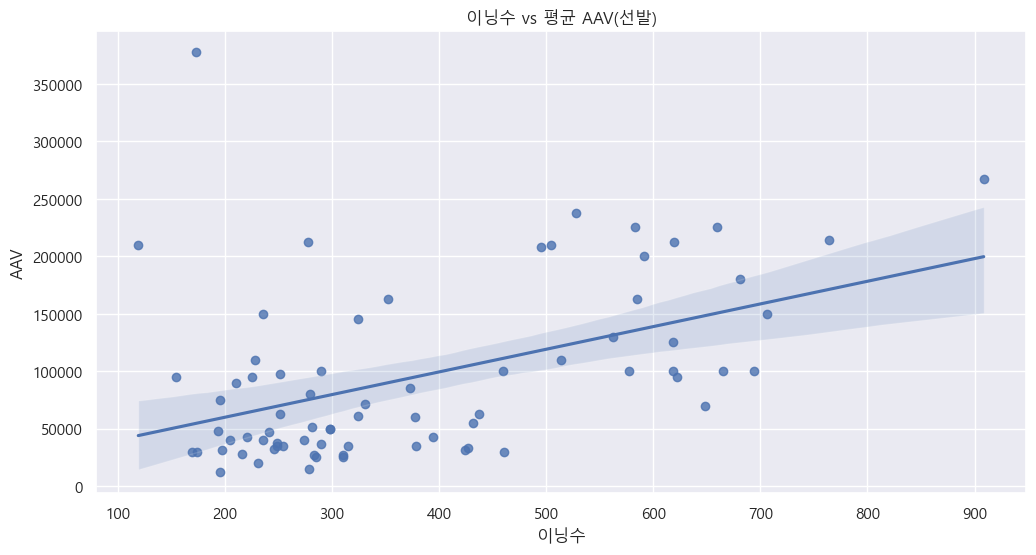

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='이닝수', y='AAV')
plt.title('이닝수 vs 평균 AAV(선발)')
plt.show()

### 상관관계 이닝수 (구원)

In [76]:
# 1. 선수명 단위로 이닝수 합계, AAV 평균, 선발 이닝 평균 계산
grouped = df.groupby('선수명').agg({
    '이닝수': 'sum',
    'AAV': 'mean',
    '구원 이닝': 'mean'
}).reset_index()

# 2. 평균 구원 이닝이 24보다 큰 선수만 필터링
filtered = grouped[grouped['구원 이닝'] > 24]

# 3. 결측치 및 이닝수 0 제거
filtered = filtered.dropna(subset=['이닝수', 'AAV'])
filtered = filtered[filtered['이닝수'] > 0]

# 4. 상관계수 계산
corr_coef, p_value = pearsonr(filtered['이닝수'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.270


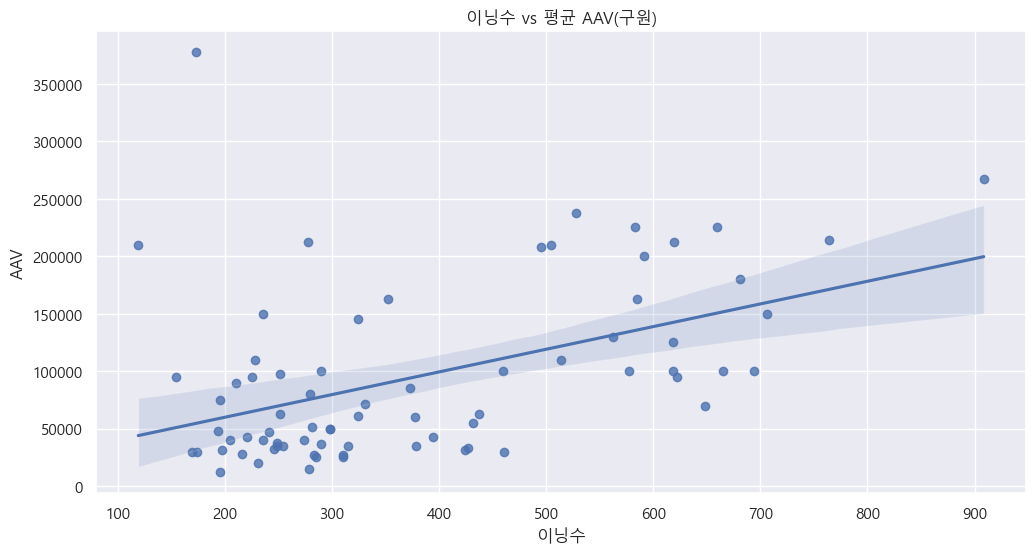

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=grouped, x='이닝수', y='AAV')
plt.title('이닝수 vs 평균 AAV(구원)')
plt.show()

# 직전년도 기록 상관관계

### 상관관계 종합 WAR

In [82]:
filtered = df_col[df_col['FA 계약 연수'] != 0]

# 2. 결측치 제거 (AAV나 이닝수가 NaN이면 상관계수 계산 불가)
#filtered = filtered.dropna(subset=['이닝수', 'AAV'])

# 3. 상관계수 계산 (합/평균 아님 → 값 그대로 사용)
corr_coef, p_value = pearsonr(filtered['종합 WAR'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.713


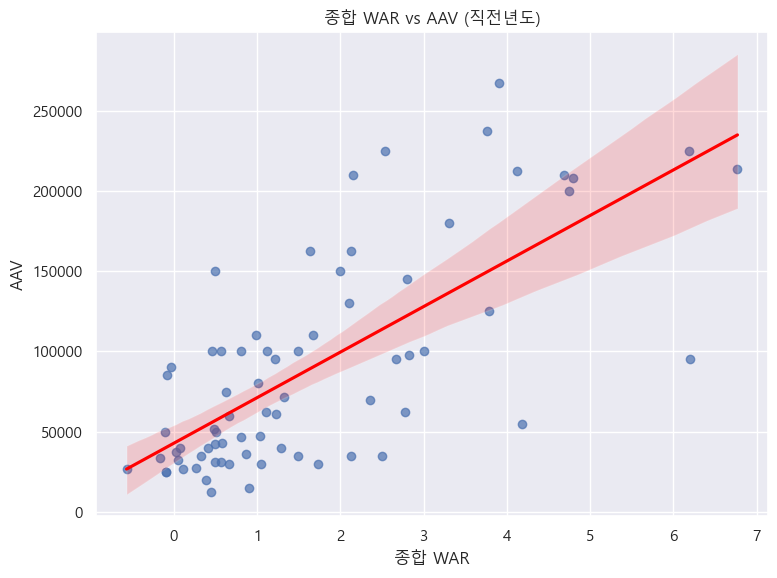

In [88]:
# 3. 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='종합 WAR', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('종합 WAR vs AAV (직전년도)')
plt.xlabel('종합 WAR')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 선발 war

In [134]:
filtered_swar = filtered[filtered['선발 이닝'] > 35]

corr_coef, p_value = pearsonr(filtered_swar['선발 WAR'], filtered_swar['AAV'])


print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.628


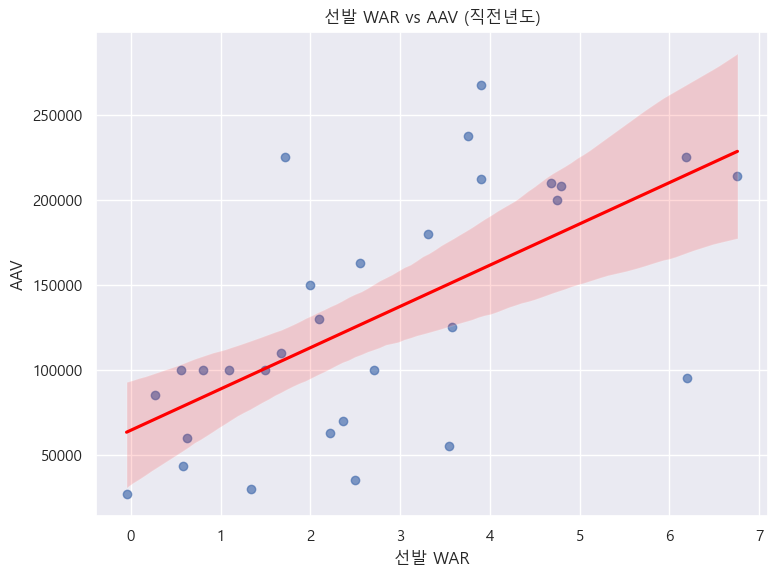

In [135]:
# 3. 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_swar, x='선발 WAR', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('선발 WAR vs AAV (직전년도)')
plt.xlabel('선발 WAR')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 구원 war

In [136]:
filtered_rwar = filtered[filtered['구원 이닝'] >10]

corr_coef, p_value = pearsonr(filtered_rwar['구원 WAR'], filtered_rwar['AAV'])


print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.337


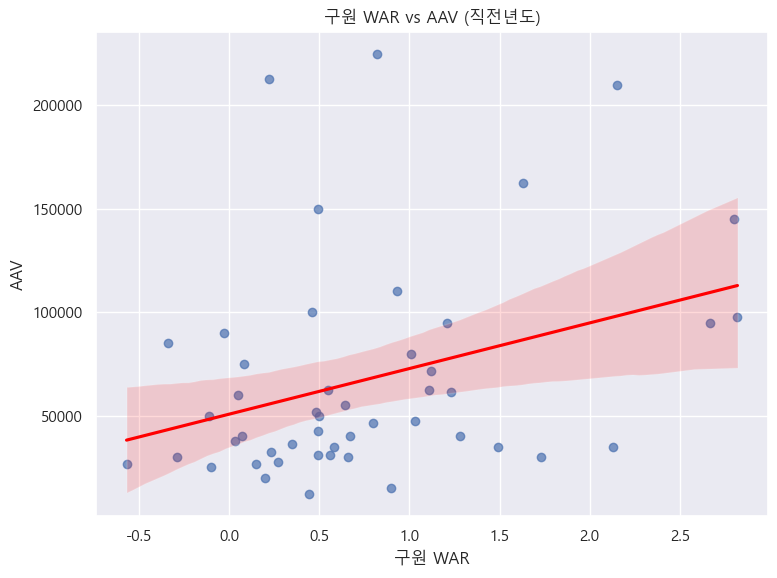

In [137]:
# 3. 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_rwar, x='구원 WAR', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('구원 WAR vs AAV (직전년도)')
plt.xlabel('구원 WAR')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 FIP

In [92]:
corr_coef, p_value = pearsonr(filtered['FIP'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.154


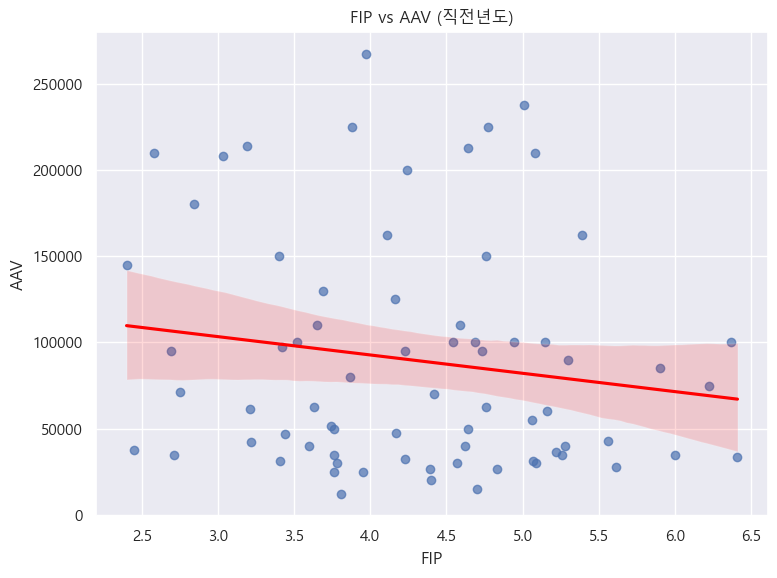

In [94]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='FIP', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('FIP vs AAV (직전년도)')
plt.xlabel('FIP')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 피장타율

In [95]:
corr_coef, p_value = pearsonr(filtered['피장타율'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.203


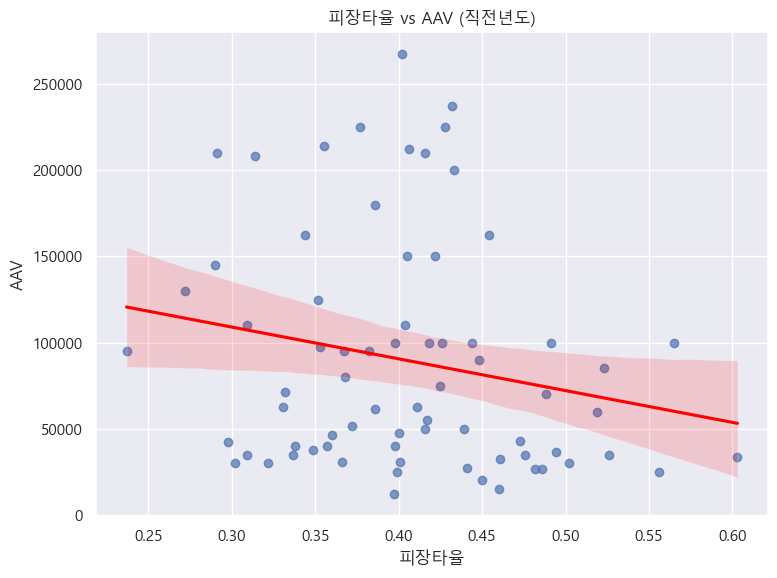

In [96]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='피장타율', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('피장타율 vs AAV (직전년도)')
plt.xlabel('피장타율')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 ERA

In [98]:
corr_coef, p_value = pearsonr(filtered['ERA'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: -0.310


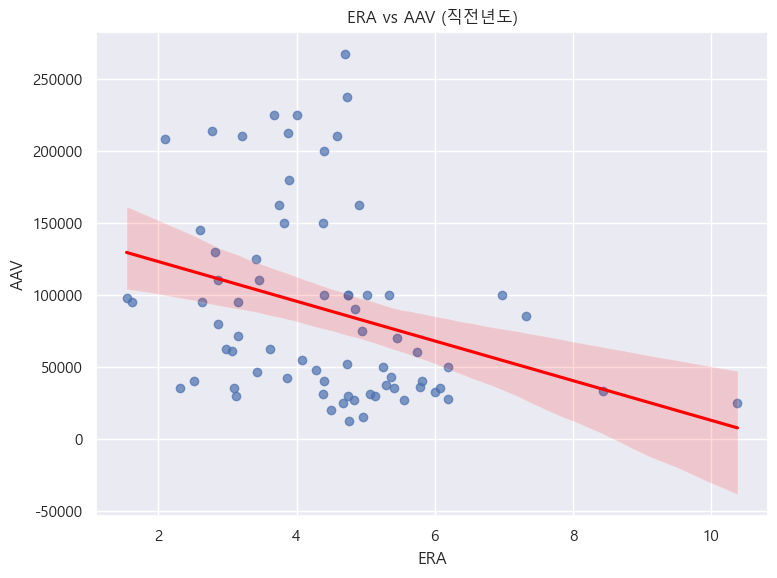

In [102]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='ERA', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('ERA vs AAV (직전년도)')
plt.xlabel('ERA')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 이닝수

In [104]:
corr_coef, p_value = pearsonr(filtered['이닝수'], filtered['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.643


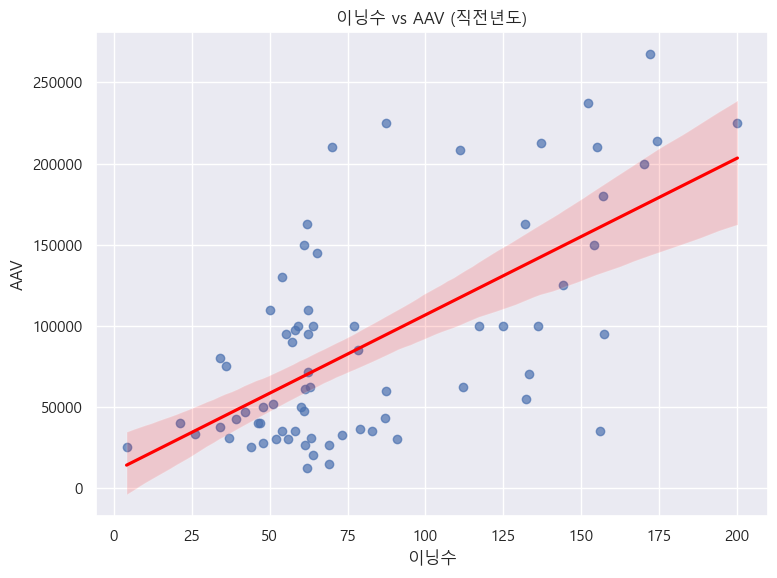

In [105]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered, x='이닝수', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('이닝수 vs AAV (직전년도)')
plt.xlabel('이닝수')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 이닝수 (선발)

In [114]:
filtered_sip = filtered[filtered['선발 이닝'] >35]

corr_coef, p_value = pearsonr(filtered_sip['이닝수'], filtered_sip['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.515


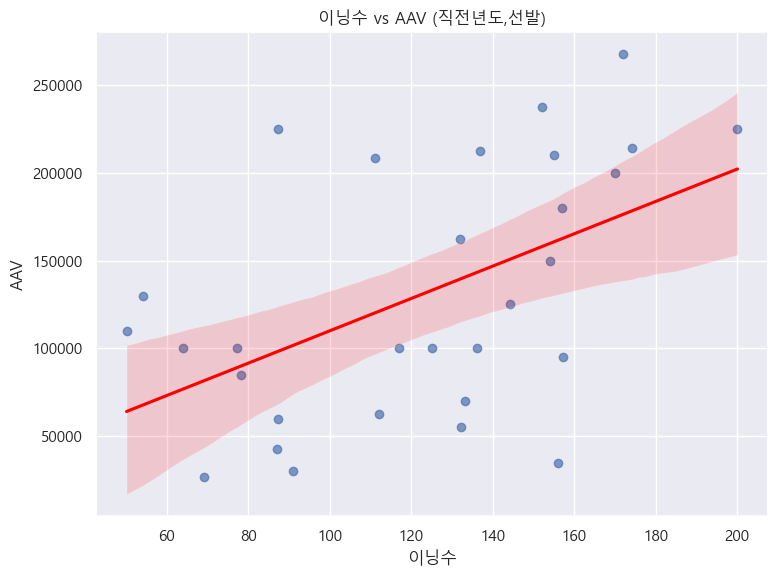

In [115]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_sip, x='이닝수', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('이닝수 vs AAV (직전년도,선발)')
plt.xlabel('이닝수')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()

### 상관관계 이닝수 (구원)

In [112]:
filtered_rip = filtered[filtered['구원 이닝'] >25]

corr_coef, p_value = pearsonr(filtered_rip['이닝수'], filtered_rip['AAV'])

print(f"상관계수: {corr_coef:.3f}")

상관계수: 0.211


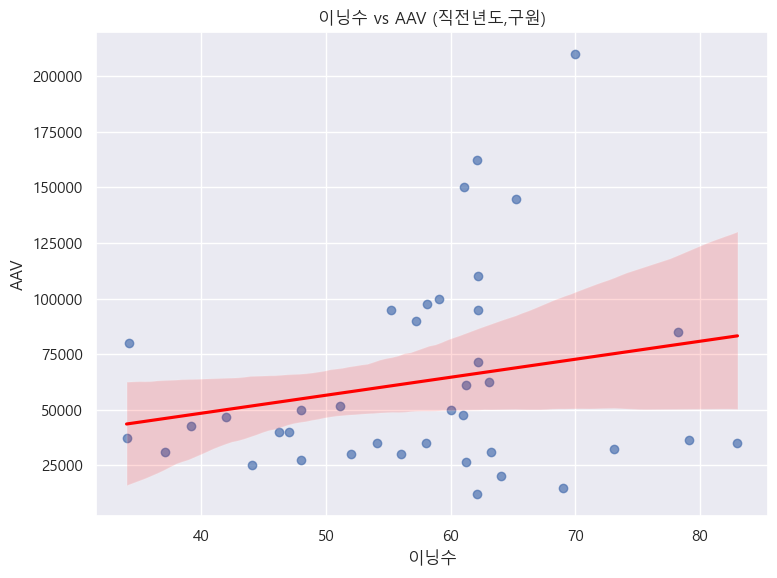

In [113]:
plt.figure(figsize=(8, 6))
sns.regplot(data=filtered_rip, x='이닝수', y='AAV', scatter_kws={'alpha': 0.7}, line_kws={'color': 'red'})
plt.title('이닝수 vs AAV (직전년도,구원)')
plt.xlabel('이닝수')
plt.ylabel('AAV')
plt.grid(True)
plt.tight_layout()
plt.show()